In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

In [2]:
data = pd.read_csv(r'fraud.csv')
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,NaN,1,1,0,1,1,0,Laborers,1.0
1,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,-1827,NaN,1,1,0,1,0,0,Cooking staff,1.0
2,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,-1029,NaN,1,1,0,1,0,0,Laborers,2.0
3,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,-4409,NaN,1,1,1,1,1,0,Sales staff,2.0
4,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,-4199,NaN,1,0,0,1,0,0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74820,215667,0,Cash loans,F,N,Y,0,112500.0,781920.0,28215.0,...,-3528,NaN,1,0,0,1,1,0,NaN,1.0
74821,441687,0,Cash loans,F,N,N,0,112500.0,454500.0,25375.5,...,-3422,NaN,1,1,0,1,0,0,Sales staff,2.0
74822,416704,0,Revolving loans,M,N,Y,1,112500.0,270000.0,13500.0,...,-1701,NaN,1,1,0,1,0,0,Cooking staff,3.0
74823,314108,0,Cash loans,F,Y,Y,1,202500.0,1696500.0,49734.0,...,-3179,6.0,1,1,0,1,1,0,Core staff,3.0


In [3]:
data.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
count,74825.000000,74825.000000,74825,74825,74825,74825,74825.000000,7.482500e+04,7.482500e+04,74821.000000,...,74825.000000,24749.000000,74825.0,74825.000000,74825.000000,74825.000000,74825.000000,74825.000000,52624,74824.000000
unique,NaN,NaN,2,2,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN
freq,NaN,NaN,68288,47269,50075,51949,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14610,NaN
mean,278091.438517,0.331774,NaN,NaN,NaN,NaN,0.429509,1.683915e+05,5.876002e+05,26951.015250,...,-2917.697467,12.458847,1.0,0.837247,0.210585,0.998209,0.271901,0.056893,NaN,2.160737
std,102708.909416,0.470854,NaN,NaN,NaN,NaN,0.730592,4.424101e+05,3.879019e+05,14012.641593,...,1516.838262,12.114476,0.0,0.369143,0.407727,0.042281,0.444942,0.231639,NaN,0.921202
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1993.500000,...,-6263.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000
25%,189439.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.736360e+05,16821.000000,...,-4252.000000,5.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,2.000000
50%,277569.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.440000e+05,5.084955e+05,24984.000000,...,-3120.000000,10.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,2.000000
75%,367088.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,7.908300e+05,34132.500000,...,-1612.000000,16.000000,1.0,1.000000,0.000000,1.000000,1.000000,0.000000,NaN,3.000000


In [4]:
data['TARGET'].value_counts()

TARGET
0    50000
1    24825
Name: count, dtype: int64

In [5]:
data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       4
AMT_GOODS_PRICE                  70
NAME_TYPE_SUITE                 325
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OWN_CAR_AGE                   50076
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                  

In [6]:
data.shape

(74825, 30)

In [7]:
data = data.drop_duplicates()

In [8]:
data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

In [9]:
data = data.drop('OWN_CAR_AGE', axis=1)

In [10]:
data = data.drop('FLAG_MOBIL', axis=1)

In [11]:
for i in ['OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS']:
    if data[i].dtype == 'object':
        data[i].fillna(data[i].mode()[0], inplace=True)
    else:
        data[i].fillna(data[i].mean(), inplace=True)

In [12]:
data.iloc[:,1:].corr(numeric_only=True)['TARGET'] #pearson

TARGET                        1.000000
CNT_CHILDREN                  0.033079
AMT_INCOME_TOTAL             -0.004427
AMT_CREDIT                   -0.054172
AMT_ANNUITY                  -0.023598
AMT_GOODS_PRICE              -0.070832
REGION_POPULATION_RELATIVE   -0.070870
DAYS_BIRTH                    0.132759
DAYS_EMPLOYED                -0.078822
DAYS_REGISTRATION             0.070846
DAYS_ID_PUBLISH               0.086218
FLAG_EMP_PHONE                0.080686
FLAG_WORK_PHONE               0.047076
FLAG_CONT_MOBILE             -0.000364
FLAG_PHONE                   -0.042674
FLAG_EMAIL                   -0.004701
CNT_FAM_MEMBERS               0.015705
Name: TARGET, dtype: float64

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['FLAG_PHONE','FLAG_WORK_PHONE',
                  #'FLAG_EMP_PHONE',
                  'DAYS_ID_PUBLISH','DAYS_REGISTRATION','DAYS_EMPLOYED',
                  #'DAYS_BIRTH',
                  'REGION_POPULATION_RELATIVE','AMT_GOODS_PRICE',
                  #'AMT_CREDIT'
                 ]]
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,1.543426,FLAG_PHONE
1,1.430568,FLAG_WORK_PHONE
2,3.608607,DAYS_ID_PUBLISH
3,2.720972,DAYS_REGISTRATION
4,1.388162,DAYS_EMPLOYED
5,2.840862,REGION_POPULATION_RELATIVE
6,2.728778,AMT_GOODS_PRICE


In [14]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [15]:
data = data[['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']]

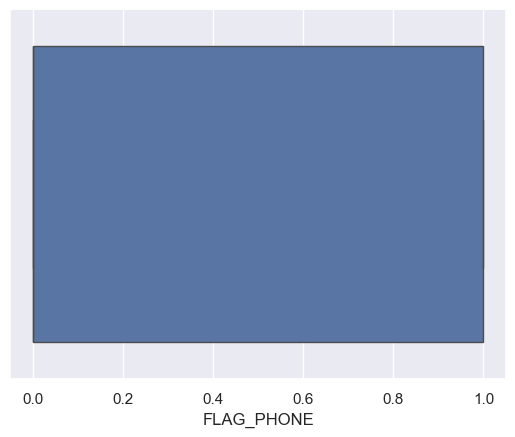

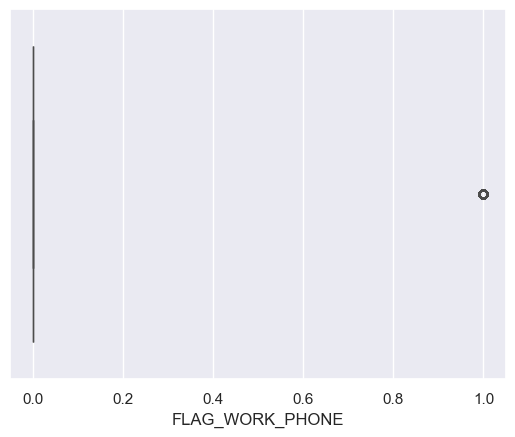

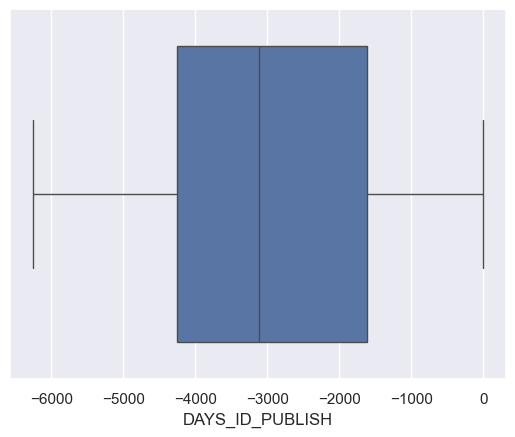

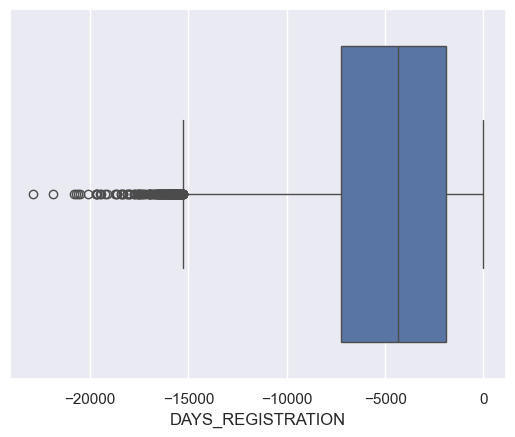

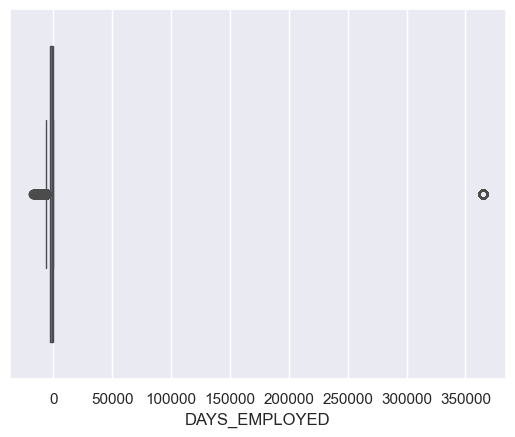

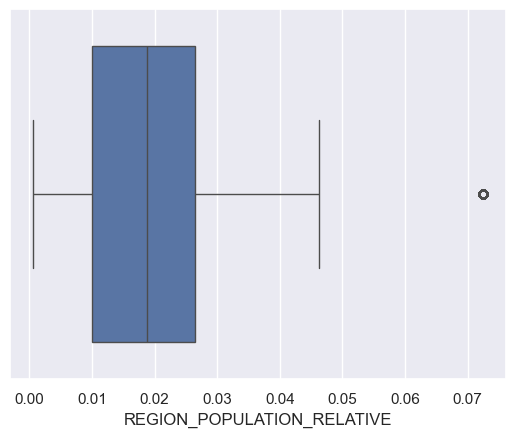

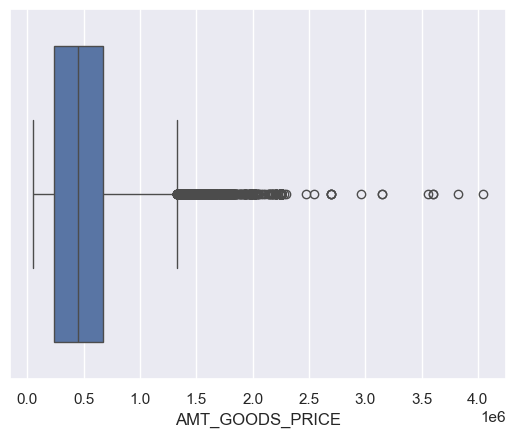

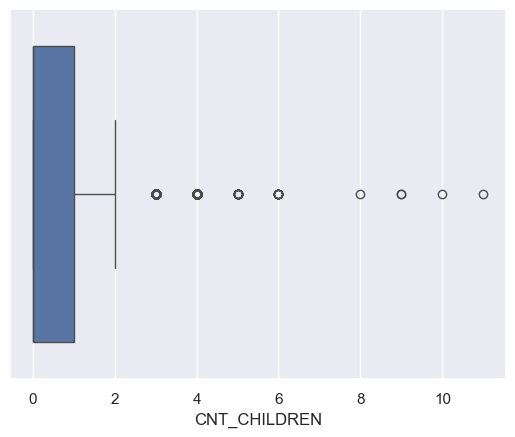

In [16]:
for i in data[['FLAG_PHONE',
               'FLAG_WORK_PHONE',
                  'DAYS_ID_PUBLISH','DAYS_REGISTRATION','DAYS_EMPLOYED',
                  'REGION_POPULATION_RELATIVE','AMT_GOODS_PRICE',
                  'CNT_CHILDREN']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [17]:
pd.set_option('display.max_columns', None)

In [18]:
data

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,1,1,0,Laborers,1.0
1,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,1,0,1,0,0,Cooking staff,1.0
2,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,1,0,1,0,0,Laborers,2.0
3,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,-4409,1,1,1,1,0,Sales staff,2.0
4,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-24794,365243,-5391.0,-4199,0,0,1,0,0,Laborers,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74820,0,Cash loans,F,N,Y,0,112500.0,781920.0,28215.0,675000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,0.030755,-20166,365243,-2647.0,-3528,0,0,1,1,0,Laborers,1.0
74821,0,Cash loans,F,N,N,0,112500.0,454500.0,25375.5,454500.0,Unaccompanied,Working,Incomplete higher,Married,House / apartment,0.006008,-11146,-169,-753.0,-3422,1,0,1,0,0,Sales staff,2.0
74822,0,Revolving loans,M,N,Y,1,112500.0,270000.0,13500.0,270000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.018209,-15657,-3889,-1686.0,-1701,1,0,1,0,0,Cooking staff,3.0
74823,0,Cash loans,F,Y,Y,1,202500.0,1696500.0,49734.0,1696500.0,Family,State servant,Higher education,Married,House / apartment,0.026392,-10564,-1223,-4463.0,-3179,1,0,1,1,0,Core staff,3.0


In [19]:
q1=data[['FLAG_PHONE','DAYS_ID_PUBLISH','DAYS_REGISTRATION','DAYS_EMPLOYED',
                  'REGION_POPULATION_RELATIVE','AMT_GOODS_PRICE',
                  'CNT_CHILDREN']].quantile(0.25)
q3=data[['FLAG_PHONE','DAYS_ID_PUBLISH','DAYS_REGISTRATION','DAYS_EMPLOYED',
                  'REGION_POPULATION_RELATIVE','AMT_GOODS_PRICE',
                  'CNT_CHILDREN']].quantile(0.75)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

In [20]:
for i in data[['FLAG_PHONE','DAYS_ID_PUBLISH','DAYS_REGISTRATION','DAYS_EMPLOYED',
                  'REGION_POPULATION_RELATIVE','AMT_GOODS_PRICE',
                  'CNT_CHILDREN']]:
    data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
    data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])

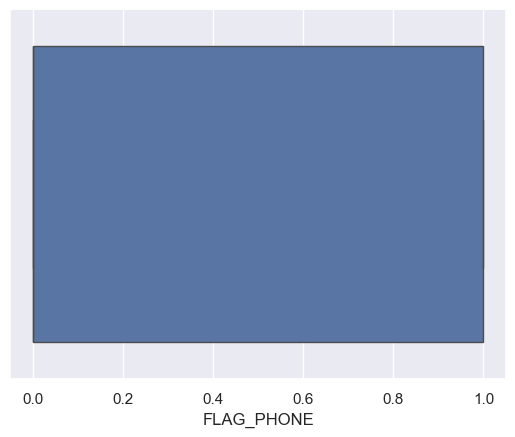

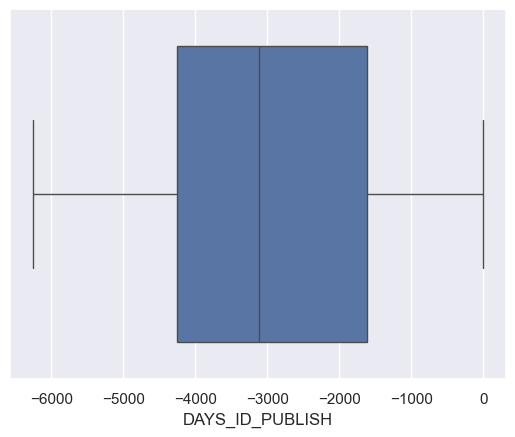

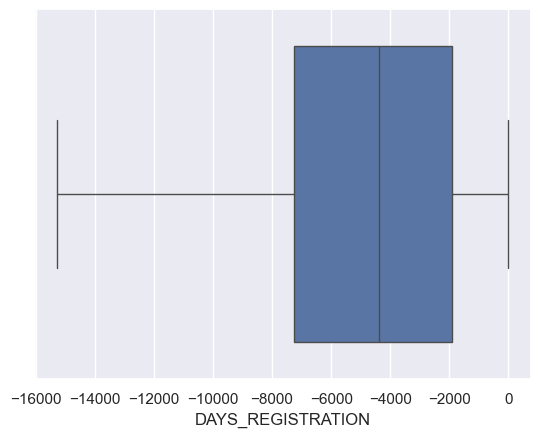

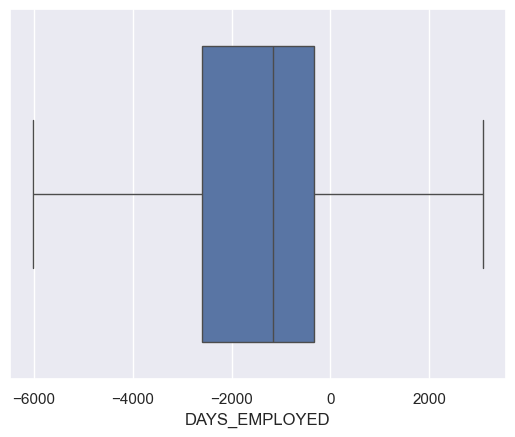

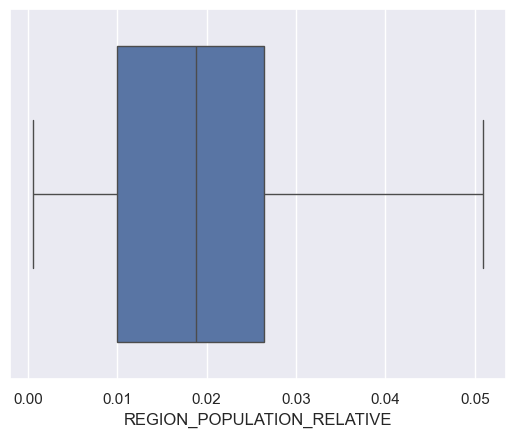

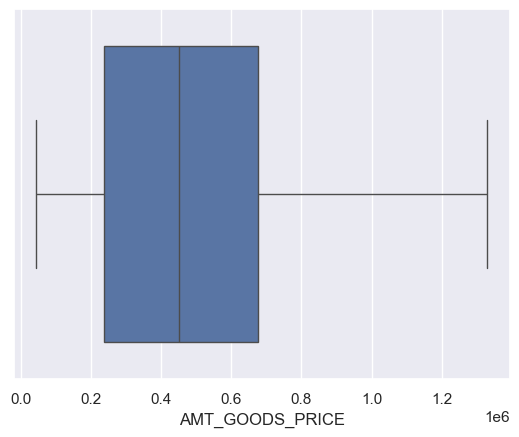

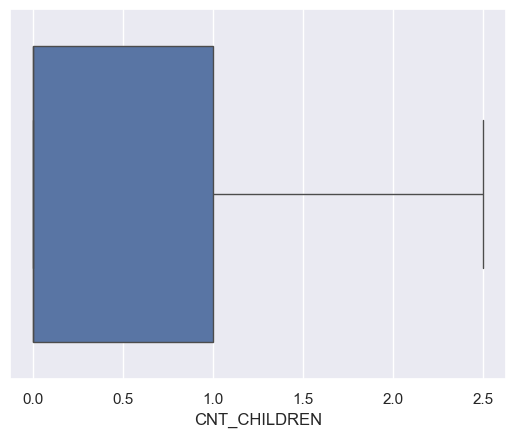

In [21]:
for i in data[['FLAG_PHONE','DAYS_ID_PUBLISH','DAYS_REGISTRATION','DAYS_EMPLOYED',
                  'REGION_POPULATION_RELATIVE','AMT_GOODS_PRICE',
                  'CNT_CHILDREN']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()
    

In [22]:
data1 = data.copy()

In [23]:
y = data['TARGET']
x1 = data.drop(['TARGET'],axis=1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=42)

In [25]:
def evaluate(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    
    y_prob = model.predict_proba(X_test)[:,1]

    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_prob = roc_prob*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print('Model Performance')

    print('Gini prob is', gini_prob*100)
    print(confusion_matrix)
    print(report)

In [26]:
data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120.0,1,0,1,1.0,0,Laborers,1.0
1,1,Cash loans,F,N,Y,0.0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628.0,-6573.0,-1827.0,1,0,1,0.0,0,Cooking staff,1.0
2,1,Cash loans,M,N,Y,0.0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262.0,-1182.0,-1029.0,1,0,1,0.0,0,Laborers,2.0
3,1,Cash loans,F,N,N,0.0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597.0,-45.0,-4409.0,1,1,1,1.0,0,Sales staff,2.0
4,1,Cash loans,F,N,Y,0.0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-24794,3094.0,-5391.0,-4199.0,0,0,1,0.0,0,Laborers,2.0


In [27]:
data.dtypes

TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                  float64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                 float64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH               float64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE                    float64
FLAG_EMAIL                      int64
OCCUPATION_TYPE                object
CNT_FAM_MEMB

In [28]:
data.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [29]:
from catboost import CatBoostClassifier

cb_str = CatBoostClassifier(cat_features=['NAME_CONTRACT_TYPE','FLAG_OWN_REALTY','FLAG_OWN_CAR','CODE_GENDER','OCCUPATION_TYPE','NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'])

In [30]:
cb_str.fit(X_train, y_train)

Learning rate set to 0.055848
0:	learn: 0.6840463	total: 214ms	remaining: 3m 34s
1:	learn: 0.6761456	total: 296ms	remaining: 2m 27s
2:	learn: 0.6689034	total: 376ms	remaining: 2m 4s
3:	learn: 0.6624952	total: 459ms	remaining: 1m 54s
4:	learn: 0.6568652	total: 535ms	remaining: 1m 46s
5:	learn: 0.6518258	total: 619ms	remaining: 1m 42s
6:	learn: 0.6470644	total: 710ms	remaining: 1m 40s
7:	learn: 0.6428632	total: 790ms	remaining: 1m 37s
8:	learn: 0.6390242	total: 872ms	remaining: 1m 36s
9:	learn: 0.6355975	total: 948ms	remaining: 1m 33s
10:	learn: 0.6324974	total: 1.03s	remaining: 1m 32s
11:	learn: 0.6297100	total: 1.11s	remaining: 1m 31s
12:	learn: 0.6272144	total: 1.19s	remaining: 1m 30s
13:	learn: 0.6247744	total: 1.26s	remaining: 1m 29s
14:	learn: 0.6225679	total: 1.35s	remaining: 1m 28s
15:	learn: 0.6206886	total: 1.42s	remaining: 1m 27s
16:	learn: 0.6188385	total: 1.5s	remaining: 1m 26s
17:	learn: 0.6170808	total: 1.58s	remaining: 1m 26s
18:	learn: 0.6158164	total: 1.66s	remaining: 1

Model Performance
Gini prob is 37.51000590462918
[[13577  1477]
 [ 5422  1972]]
              precision    recall  f1-score   support

           0       0.71      0.90      0.80     15054
           1       0.57      0.27      0.36      7394

    accuracy                           0.69     22448
   macro avg       0.64      0.58      0.58     22448
weighted avg       0.67      0.69      0.65     22448



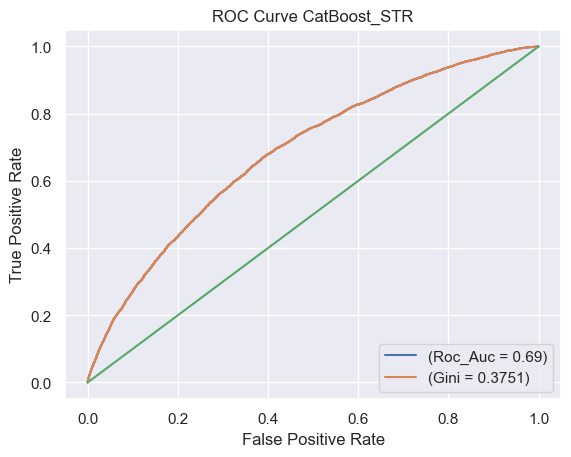

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

result = evaluate(cb_str, X_test, y_test)
y_prob = cb_str.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.4f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve CatBoost_STR')

plt.legend(loc='lower right')
plt.show()

In [32]:
import numpy as np
import pandas as pd

for var in data.columns[:-1]:
    if data[var].dtypes != object:
        q1 = data[var].quantile(0.25)
        q2 = data[var].quantile(0.5)
        q3 = data[var].quantile(0.75)

        ranges = [-np.inf, q1, q2, q3, np.inf]
        data['category_' + var] = pd.cut(data[var], bins=ranges, duplicates='drop')

        grouped = data.groupby(['category_' + var, 'TARGET'])['TARGET'].count().unstack().reset_index()

        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
        grouped.rename(columns={'woe': var + '_woe'}, inplace=True)
        data = data.merge(grouped[['category_' + var, var + '_woe']], how='left', on='category_' + var)
        
data

C:\Users\FX517ZM\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,category_TARGET,TARGET_woe,category_CNT_CHILDREN,CNT_CHILDREN_woe,category_AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_woe,category_AMT_CREDIT,AMT_CREDIT_woe,category_AMT_ANNUITY,AMT_ANNUITY_woe,category_AMT_GOODS_PRICE,AMT_GOODS_PRICE_woe,category_REGION_POPULATION_RELATIVE,REGION_POPULATION_RELATIVE_woe,category_DAYS_BIRTH,DAYS_BIRTH_woe,category_DAYS_EMPLOYED,DAYS_EMPLOYED_woe,category_DAYS_REGISTRATION,DAYS_REGISTRATION_woe,category_DAYS_ID_PUBLISH,DAYS_ID_PUBLISH_woe,category_FLAG_EMP_PHONE,FLAG_EMP_PHONE_woe,category_FLAG_WORK_PHONE,FLAG_WORK_PHONE_woe,category_FLAG_CONT_MOBILE,FLAG_CONT_MOBILE_woe,category_FLAG_PHONE,FLAG_PHONE_woe,category_FLAG_EMAIL,FLAG_EMAIL_woe
0,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120.0,1,0,1,1.0,0,Laborers,1.0,"(0.0, 1.0]",-inf,"(-inf, 0.0]",0.050731,"(144000.0, 202500.0]",-0.044298,"(273636.0, 508495.5]",-0.195236,"(16821.0, 24984.0]",-0.080804,"(238500.0, 450000.0]",-0.337108,"(0.01, 0.0188]",-0.080203,"(-12062.0, inf]",-0.340835,"(-1155.0, -326.0]",-0.331633,"(-4364.0, -1898.0]",-0.084550,"(-3120.0, -1612.0]",-0.100225,"(-inf, 1.0]",0.0,"(-inf, 0.0]",0.052104,"(-inf, 1.0]",0.0,"(0.0, 1.0]",0.152398,"(-inf, 0.0]",-0.002451
1,1,Cash loans,F,N,Y,0.0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628.0,-6573.0,-1827.0,1,0,1,0.0,0,Cooking staff,1.0,"(0.0, 1.0]",-inf,"(-inf, 0.0]",0.050731,"(-inf, 112500.0]",-0.049919,"(790830.0, inf]",0.255651,"(24984.0, 34128.0]",-0.149119,"(675000.0, inf]",0.377029,"(0.01, 0.0188]",-0.080203,"(-19269.0, -15315.0]",0.102008,"(-inf, -2606.0]",0.358638,"(-7245.0, -4364.0]",-0.020543,"(-3120.0, -1612.0]",-0.100225,"(-inf, 1.0]",0.0,"(-inf, 0.0]",0.052104,"(-inf, 1.0]",0.0,"(-inf, 0.0]",-0.054887,"(-inf, 0.0]",-0.002451
2,1,Cash loans,M,N,Y,0.0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262.0,-1182.0,-1029.0,1,0,1,0.0,0,Laborers,2.0,"(0.0, 1.0]",-inf,"(-inf, 0.0]",0.050731,"(144000.0, 202500.0]",-0.044298,"(790830.0, inf]",0.255651,"(34128.0, inf]",0.108424,"(675000.0, inf]",0.377029,"(0.0188, 0.0264]",-0.036527,"(-19269.0, -15315.0]",0.102008,"(-2606.0, -1155.0]",-0.106946,"(-1898.0, inf]",-0.130689,"(-1612.0, inf]",-0.225438,"(-inf, 1.0]",0.0,"(-inf, 0.0]",0.052104,"(-inf, 1.0]",0.0,"(-inf, 0.0]",-0.054887,"(-inf, 0.0]",-0.002451
3,1,Cash loans,F,N,N,0.0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597.0,-45.0,-4409.0,1,1,1,1.0,0,Sales staff,2.0,"(0.0, 1.0]",-inf,"(-inf, 0.0]",0.050731,"(112500.0, 144000.0]",-0.055483,"(273636.0, 508495.5]",-0.195236,"(-inf, 16821.0]",0.130998,"(-inf, 238500.0]",0.012569,"(-inf, 0.01]",-0.080824,"(-15315.0, -12062.0]",-0.118965,"(-inf, -2606.0]",0.358638,"(-1898.0, inf]",-0.130689,"(-inf, -4252.0]",0.291185,"(-inf, 1.0]",0.0,"(0.0, inf]",-0.188026,"(-inf, 1.0]",0.0,"(0.0, 1.0]",0.152398,"(-inf, 0.0]",-0.002451
4,1,Cash loans,F,N,Y,0.0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-24794,3094.0,-5391.0,-4199.0,0,0,1,0.0,0,Laborers,2.0,"(0.0, 1.0]",-inf,"(-inf, 0.0]",0.050731,"(-inf, 112500.0]",-0.049919,"(-inf, 273636.0]",0.111896,"(-inf, 16821.0]",0.130998,"(238500.0, 450000.0]",-0.337108,"(0.0264, inf]",0.215738,"(-inf, -19269.0]",0.410305,"(-32

In [33]:
data.isnull().sum()

TARGET                                 0
NAME_CONTRACT_TYPE                     0
CODE_GENDER                            0
FLAG_OWN_CAR                           0
FLAG_OWN_REALTY                        0
CNT_CHILDREN                           0
AMT_INCOME_TOTAL                       0
AMT_CREDIT                             0
AMT_ANNUITY                            0
AMT_GOODS_PRICE                        0
NAME_TYPE_SUITE                        0
NAME_INCOME_TYPE                       0
NAME_EDUCATION_TYPE                    0
NAME_FAMILY_STATUS                     0
NAME_HOUSING_TYPE                      0
REGION_POPULATION_RELATIVE             0
DAYS_BIRTH                             0
DAYS_EMPLOYED                          0
DAYS_REGISTRATION                      0
DAYS_ID_PUBLISH                        0
FLAG_EMP_PHONE                         0
FLAG_WORK_PHONE                        0
FLAG_CONT_MOBILE                       0
FLAG_PHONE                             0
FLAG_EMAIL      

In [34]:
for var in data.columns:
    if data[var].dtypes==object:
        grouped = data.groupby([var, 'TARGET'])['TARGET'].count().unstack().reset_index()

        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])

        grouped.rename(columns={'woe':var+'_woe'}, inplace=True)
        data = data.merge(grouped[[var,var+'_woe']], how='left', on=var)

data

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,category_TARGET,TARGET_woe,category_CNT_CHILDREN,CNT_CHILDREN_woe,category_AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_woe,category_AMT_CREDIT,AMT_CREDIT_woe,category_AMT_ANNUITY,AMT_ANNUITY_woe,category_AMT_GOODS_PRICE,AMT_GOODS_PRICE_woe,category_REGION_POPULATION_RELATIVE,REGION_POPULATION_RELATIVE_woe,category_DAYS_BIRTH,DAYS_BIRTH_woe,category_DAYS_EMPLOYED,DAYS_EMPLOYED_woe,category_DAYS_REGISTRATION,DAYS_REGISTRATION_woe,category_DAYS_ID_PUBLISH,DAYS_ID_PUBLISH_woe,category_FLAG_EMP_PHONE,FLAG_EMP_PHONE_woe,category_FLAG_WORK_PHONE,FLAG_WORK_PHONE_woe,category_FLAG_CONT_MOBILE,FLAG_CONT_MOBILE_woe,category_FLAG_PHONE,FLAG_PHONE_woe,category_FLAG_EMAIL,FLAG_EMAIL_woe,NAME_CONTRACT_TYPE_woe,CODE_GENDER_woe,FLAG_OWN_CAR_woe,FLAG_OWN_REALTY_woe,NAME_TYPE_SUITE_woe,NAME_INCOME_TYPE_woe,NAME_EDUCATION_TYPE_woe,NAME_FAMILY_STATUS_woe,NAME_HOUSING_TYPE_woe,OCCUPATION_TYPE_woe
0,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120.0,1,0,1,1.0,0,Laborers,1.0,"(0.0, 1.0]",-inf,"(-inf, 0.0]",0.050731,"(144000.0, 202500.0]",-0.044298,"(273636.0, 508495.5]",-0.195236,"(16821.0, 24984.0]",-0.080804,"(238500.0, 450000.0]",-0.337108,"(0.01, 0.0188]",-0.080203,"(-12062.0, inf]",-0.340835,"(-1155.0, -326.0]",-0.331633,"(-4364.0, -1898.0]",-0.084550,"(-3120.0, -1612.0]",-0.100225,"(-inf, 1.0]",0.0,"(-inf, 0.0]",0.052104,"(-inf, 1.0]",0.0,"(0.0, 1.0]",0.152398,"(-inf, 0.0]",-0.002451,-0.037079,-0.238828,-0.056705,0.021992,-0.013983,-0.187705,-0.115212,-0.211579,0.039542,0.011902
1,1,Cash loans,F,N,Y,0.0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628.0,-6573.0,-1827.0,1,0,1,0.0,0,Cooking staff,1.0,"(0.0, 1.0]",-inf,"(-inf, 0.0]",0.050731,"(-inf, 112500.0]",-0.049919,"(790830.0, inf]",0.255651,"(24984.0, 34128.0]",-0.149119,"(675000.0, inf]",0.377029,"(0.01, 0.0188]",-0.080203,"(-19269.0, -15315.0]",0.102008,"(-inf, -2606.0]",0.358638,"(-7245.0, -4364.0]",-0.020543,"(-3120.0, -1612.0]",-0.100225,"(-inf, 1.0]",0.0,"(-inf, 0.0]",0.052104,"(-inf, 1.0]",0.0,"(-inf, 0.0]",-0.054887,"(-inf, 0.0]",-0.002451,-0.037079,0.148204,-0.056705,0.021992,-0.013983,-0.187705,-0.115212,0.340214,0.039542,-0.325780
2,1,Cash loans,M,N,Y,0.0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262.0,-1182.0,-1029.0,1,0,1,0.0,0,Laborers,2.0,"(0.0, 1.0]",-inf,"(-inf, 0.0]",0.050731,"(144000.0, 202500.0]",-0.044298,"(790830.0, inf]",0.255651,"(34128.0, inf]",0.108424,"(675000.0, inf]",0.377029,"(0.0188, 0.0264]",-0.036527,"(-19269.0, -15315.0]",0.102008,"(-2606.0, -1155.0]",-0.106946,"(-1898.0, inf]",-0.130689,"(-1612.0, inf]",-0.225438,"(-inf, 1.0]",0.0,"(-inf, 0.0]",0.052104,"(-inf, 1.0]",0.0,"(-inf, 0.0]",-0.054887,"(-inf, 0.0]",-0.002451,-0.037079,-0.238828,-0.056705,0.021992,-0.013983,0.090742,-0.115212,0.072054,0.039542,0.011902
3,1,Cash loans,F,N,N,0.0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597.0,-45.0,-4409.0,1,1,1,1.0,0,Sales staff,2.0,"(0.0, 1.0]",-inf,"(-inf, 0.0]",0.050731,"(112500.0, 144000.0]",-0.055483,"(273636.0, 508495.5]",-0.195236,"(-inf, 16821.0]",0.130998,"(-inf, 238500.0]",0.012569,"(-inf, 0.01]",-0.080824,"(-15315.0, -12062.0]",-0.118965,"(-inf, -2606.0]",0.358638,"(-1898.0, inf]",-0.130689,"(-inf, -4252.0]",0.291185,"(-inf, 1.0]",0.0,"(0.0, inf]"

In [35]:
null_counts = data.isnull().sum().to_frame(name='Missing Values')

In [36]:
pd.set_option('display.max_columns', None)

print(null_counts)

                         Missing Values
TARGET                                0
NAME_CONTRACT_TYPE                    0
CODE_GENDER                           0
FLAG_OWN_CAR                          0
FLAG_OWN_REALTY                       0
...                                 ...
NAME_INCOME_TYPE_woe                  4
NAME_EDUCATION_TYPE_woe               0
NAME_FAMILY_STATUS_woe                1
NAME_HOUSING_TYPE_woe                 0
OCCUPATION_TYPE_woe                   0

[69 rows x 1 columns]


In [37]:
print(data.isnull().sum().head(35))

TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
FLAG_EMP_PHONE                0
FLAG_WORK_PHONE               0
FLAG_CONT_MOBILE              0
FLAG_PHONE                    0
FLAG_EMAIL                    0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
category_TARGET               0
TARGET_woe                    0
category_CNT_CHILDREN         0
CNT_CHILDREN_woe              0
category

In [38]:
for i in ['NAME_INCOME_TYPE_woe', 'NAME_FAMILY_STATUS_woe']:
    if data[i].dtype == 'object':
        data[i].fillna(data[i].mode()[0], inplace=True)
    else:
        data[i].fillna(data[i].mean(), inplace=True)

In [39]:
woe_features = data.filter(regex='_woe$', axis=1)
woe_features.columns

Index(['TARGET_woe', 'CNT_CHILDREN_woe', 'AMT_INCOME_TOTAL_woe',
       'AMT_CREDIT_woe', 'AMT_ANNUITY_woe', 'AMT_GOODS_PRICE_woe',
       'REGION_POPULATION_RELATIVE_woe', 'DAYS_BIRTH_woe', 'DAYS_EMPLOYED_woe',
       'DAYS_REGISTRATION_woe', 'DAYS_ID_PUBLISH_woe', 'FLAG_EMP_PHONE_woe',
       'FLAG_WORK_PHONE_woe', 'FLAG_CONT_MOBILE_woe', 'FLAG_PHONE_woe',
       'FLAG_EMAIL_woe', 'NAME_CONTRACT_TYPE_woe', 'CODE_GENDER_woe',
       'FLAG_OWN_CAR_woe', 'FLAG_OWN_REALTY_woe', 'NAME_TYPE_SUITE_woe',
       'NAME_INCOME_TYPE_woe', 'NAME_EDUCATION_TYPE_woe',
       'NAME_FAMILY_STATUS_woe', 'NAME_HOUSING_TYPE_woe',
       'OCCUPATION_TYPE_woe'],
      dtype='object')

In [40]:
inputs = data[['CNT_CHILDREN_woe', 'AMT_INCOME_TOTAL_woe',
       'AMT_CREDIT_woe', 'AMT_ANNUITY_woe', 'AMT_GOODS_PRICE_woe',
       'REGION_POPULATION_RELATIVE_woe', 'DAYS_BIRTH_woe', 'DAYS_EMPLOYED_woe',
       'DAYS_REGISTRATION_woe', 'DAYS_ID_PUBLISH_woe', 'FLAG_EMP_PHONE_woe',
       'FLAG_WORK_PHONE_woe', 'FLAG_CONT_MOBILE_woe', 'FLAG_PHONE_woe',
       'FLAG_EMAIL_woe', 'NAME_CONTRACT_TYPE_woe', 'CODE_GENDER_woe',
       'FLAG_OWN_CAR_woe', 'FLAG_OWN_REALTY_woe', 'NAME_TYPE_SUITE_woe',
       'NAME_INCOME_TYPE_woe', 'NAME_EDUCATION_TYPE_woe',
       'NAME_FAMILY_STATUS_woe', 'NAME_HOUSING_TYPE_woe',
       'OCCUPATION_TYPE_woe']]
output = data['TARGET']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

Model Performance
Gini prob is 31.79977560899776
[[13947  1107]
 [ 6002  1392]]
              precision    recall  f1-score   support

           0       0.70      0.93      0.80     15054
           1       0.56      0.19      0.28      7394

    accuracy                           0.68     22448
   macro avg       0.63      0.56      0.54     22448
weighted avg       0.65      0.68      0.63     22448



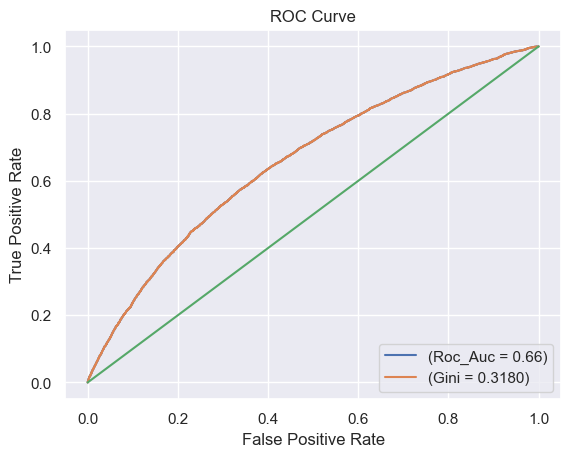

In [43]:
result = evaluate(clf, X_test, y_test)
y_prob = clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.4f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

In [44]:
data1

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120.0,1,0,1,1.0,0,Laborers,1.0
1,1,Cash loans,F,N,Y,0.0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628.0,-6573.0,-1827.0,1,0,1,0.0,0,Cooking staff,1.0
2,1,Cash loans,M,N,Y,0.0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262.0,-1182.0,-1029.0,1,0,1,0.0,0,Laborers,2.0
3,1,Cash loans,F,N,N,0.0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597.0,-45.0,-4409.0,1,1,1,1.0,0,Sales staff,2.0
4,1,Cash loans,F,N,Y,0.0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-24794,3094.0,-5391.0,-4199.0,0,0,1,0.0,0,Laborers,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74820,0,Cash loans,F,N,Y,0.0,112500.0,781920.0,28215.0,675000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,0.030755,-20166,3094.0,-2647.0,-3528.0,0,0,1,1.0,0,Laborers,1.0
74821,0,Cash loans,F,N,N,0.0,112500.0,454500.0,25375.5,454500.0,Unaccompanied,Working,Incomplete higher,Married,House / apartment,0.006008,-11146,-169.0,-753.0,-3422.0,1,0,1,0.0,0,Sales staff,2.0
74822,0,Revolving loans,M,N,Y,1.0,112500.0,270000.0,13500.0,270000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.018209,-15657,-3889.0,-1686.0,-1701.0,1,0,1,0.0,0,Cooking staff,3.0
74823,0,Cash loans,F,Y,Y,1.0,202500.0,1696500.0,49734.0,1329750.0,Family,State servant,Higher education,Married,House / apartment,0.026392,-10564,-1223.0,-4463.0,-3179.0,1,0,1,1.0,0,Core staff,3.0


In [45]:
data_dum = pd.get_dummies(data1, drop_first=True).astype(int)

In [46]:
y2 = data_dum['TARGET']
x2 = data_dum.drop(['TARGET'],axis=1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3, random_state=42)

In [48]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [49]:
def evaluate(X_test, y_test):

    models = [RandomForestClassifier(),svm.SVC(probability=True),
             CatBoostClassifier(),XGBClassifier(),LGBMClassifier()]
   
    for model in models:
            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)
        
            y_prob = model.predict_proba(X_test)[:,1]
        
            roc_prob = roc_auc_score(y_test, y_prob)
            
            gini_prob = roc_prob*2-1
            
            confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
            report = classification_report(y_test, y_pred)
            
            print('Model Performance')
        
            print('Gini prob is', gini_prob*100)
            print(report)
            print(model)
            print(confusion_matrix)
        
            y_prob = model.predict_proba(X_test)[:,1]
    
            roc_auc = roc_auc_score(y_test, y_prob)
            gini = (2*roc_auc_score(y_test, y_prob))-1
            
            fpr, tpr, thresholds = roc_curve(y_test, y_prob)
            plt.figure()
            
            plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
            plt.plot(fpr, tpr, label='(Gini = %0.4f)' % gini)
            plt.plot([0, 1], [0, 1])
            plt.xlim()
            plt.ylim()
            
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC Curve')
            
            plt.legend(loc='lower right')
            plt.show()


In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Model Performance
Gini prob is 30.893279729894196
              precision    recall  f1-score   support

           0       0.70      0.92      0.80     15054
           1       0.56      0.20      0.30      7394

    accuracy                           0.69     22448
   macro avg       0.63      0.56      0.55     22448
weighted avg       0.66      0.69      0.63     22448

RandomForestClassifier()
[[13885  1169]
 [ 5892  1502]]


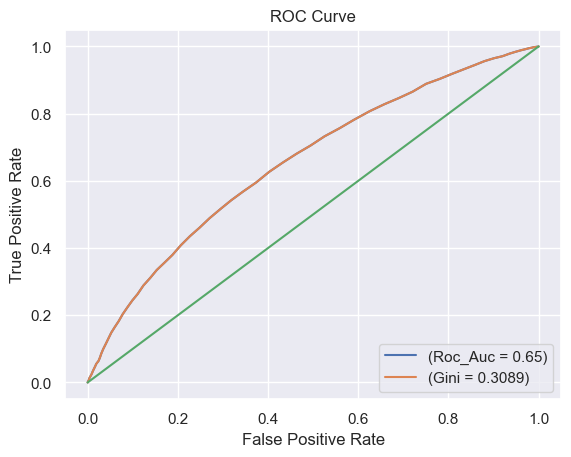

C:\Users\FX517ZM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\FX517ZM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\FX517ZM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

Model Performance
Gini prob is 16.099598024516837
              precision    recall  f1-score   support

           0       0.67      1.00      0.80     15054
           1       0.00      0.00      0.00      7394

    accuracy                           0.67     22448
   macro avg       0.34      0.50      0.40     22448
weighted avg       0.45      0.67      0.54     22448

SVC(probability=True)
[[15054     0]
 [ 7394     0]]


In [ ]:
evaluate(X_test, y_test)